In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from IPython.display import display
import pandas as pd
import seaborn.apionly as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# Enable inline plotting  
%matplotlib inline

In [3]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.5.5 | packaged by conda-forge | (default, Jul 23 2018, 23:45:11) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
Pandas version 0.23.4
Numpy version 1.15.2


#  FIG A.13(b): Efficiency Comparison-Bridge DATA

In [4]:
data1 = 'df7-comm-updated-rmsd-Bridge.csv'
data2 = 'df7-comm-updated-rmsd-parallel-IO-Bridge4.csv'
data3 = 'df7-comm-updated-rmsd-parallel-IO-Bridge1.csv'
data4 = 'df7-comm-updated-rmsd-parallel-IO-Bridge2.csv'
data5 = 'df7-comm-updated-rmsd-parallel-IO-Bridge3.csv'

In [5]:
df_data1 = pd.read_csv(data1)
df_data2 = pd.read_csv(data2)
df_data3 = pd.read_csv(data3)
df_data4 = pd.read_csv(data4)
df_data5 = pd.read_csv(data5)

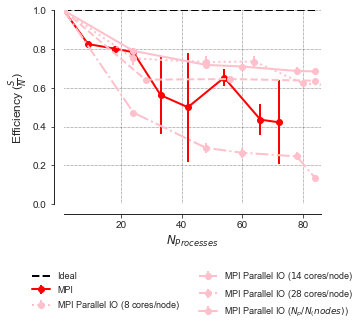

In [9]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 9
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

df = [df_data1,df_data2,df_data3,df_data4,df_data5]

df[4].plot(y='Ideal_Efficiency', x='blocks', ax=ax, linestyle='--', color='k', lw=2,label='')
df[0].plot(y='efficiency', x='blocks', yerr='std_E', ax=ax, marker='o', lw=2, color='red')
df[2].plot(y='efficiency', x='blocks', yerr='std_E', ax=ax, marker='o', lw=2, linestyle=':', color='pink')
df[1].plot(y='efficiency', x='blocks', yerr='std_E', ax=ax, marker='o', lw=2, linestyle='--', color='pink')
df[3].plot(y='efficiency', x='blocks', yerr='std_E', ax=ax, marker='o', lw=2, linestyle='-.', color='pink')
df[4].plot(y='efficiency', x='blocks', yerr='std_E', ax=ax, marker='o', lw=2, color='pink')

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black') 

ax.set_xlabel('$N_{Processes}$')
ax.set_ylabel(r'Efficiency ($\frac{S}{N}$)')
ax.set_xlim(1, 86)
ax.set_ylim(0, 1)
sns.despine(offset=10, ax=ax)
lgd = ax.legend(['Ideal','MPI','MPI Parallel IO ($8$ cores/node)','MPI Parallel IO ($14$ cores/node)','MPI Parallel IO ($28$ cores/node)',
    'MPI Parallel IO ($N_{p}/N_(nodes)$)'],loc='upper center', bbox_to_anchor=(0.50, -0.3), frameon=False, fancybox=True, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'Comparison_Efficiency_all_Bridges'
# fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')